<a href="https://colab.research.google.com/github/Sandhyarani-beere/Data-science/blob/main/web%20scrapping%20on%20swiggy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAME : B.Sandhya Rani

Reg.NO : 9920004294

## Assignment : 3

In [ ]:
from bs4 import BeautifulSoup
import requests
import csv
import pandas as pd

url = "https://www.swiggy.com/restaurants/shaack-anna-nagar-annanagar-east-chennai-30725?query=chilli+chicken"
p = requests.get(url)
soup = BeautifulSoup(p.content,'html.parser')
print(p)
content = soup.find_all('div', class_="_2wg_t")
fheader = ["foodname","price"]

itemfull = []

for item in content:
  items = []

  foodname = item.find('h3', class_="styles_itemNameText__3ZmZZ")
  price = item.find('span', class_="rupee")
 
  
  
  if(foodname is not None):
    items.append(foodname.text)
  else:
    items.append("foodname is NA")
  if(price is not None):
    items.append(price.text)
  else:
    items.append("Price is not valuable")
 

  
  itemfull.append(items)

pd.DataFrame(itemfull).to_csv("dish.csv",header=fheader)


<Response [200]>


In [ ]:
import pandas as pd
data = pd.read_csv("dish.csv")
data


,Unnamed: 0,foodname,price
0,0,Chicken Fried Rice,230
1,1,Andhra Chilli Chicken,320
2,2,Chicken 65,290
3,3,Chilli Chicken ( Serves One ),330
4,4,Stir Fried Chicken Cubes,280
...,...,...,...
78,78,`Arrabiata Pasta,330
79,79,Seafood Marinara Pasta,410
80,80,Chicken Parmigiana,400
81,81,Shack'S Chicken Steak,420


In [ ]:
df = data.head(15)
df

,Unnamed: 0,foodname,price
0,0,Chicken Fried Rice,230
1,1,Andhra Chilli Chicken,320
2,2,Chicken 65,290
3,3,Chilli Chicken ( Serves One ),330
4,4,Stir Fried Chicken Cubes,280
5,5,Veg Chilli Basil Fried Rice,240
6,6,Chicken Chilli Basil Fried Rice,270
7,7,Cream of Broccoli Soup,200
8,8,Chicken Fried Rice,230
9,9,Salt & Pepper Mushroom,190


In [ ]:
data.describe()


,Unnamed: 0,price
count,83.000000,83.000000
mean,41.000000,268.313253
std,24.103942,77.755390
min,0.000000,100.000000
25%,20.500000,210.000000
50%,41.000000,250.000000
75%,61.500000,320.000000
max,82.000000,420.000000


#Scatter Plot#

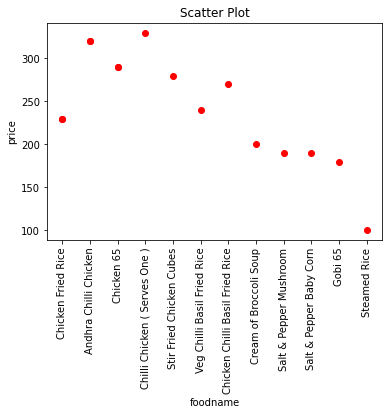

In [ ]:
import matplotlib.pyplot as plt
x = df.foodname 
y = df.price
plt.scatter(x,y,color="red")
plt.xlabel("foodname")
plt.ylabel("price")
plt.xticks(rotation='vertical') 
plt.title("Scatter Plot")
plt.show()


















#Bar plot#

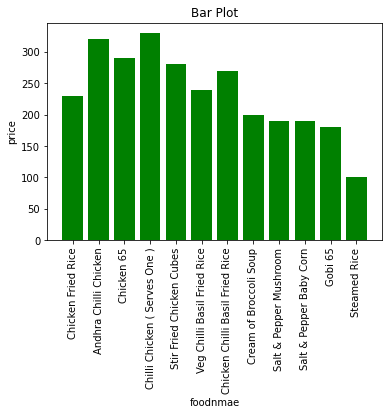

In [ ]:
import matplotlib.pyplot as plt
x = df.foodname
y = df.price
plt.bar(x,y,color="green")
plt.xlabel("foodnmae")
plt.ylabel("price")
plt.xticks(rotation='vertical') 
plt.title("Bar Plot")
plt.show()

#Figure Factory Table#

In [ ]:
import plotly.figure_factory as ff

data_matrix = [df.foodname,df.price]
colorscale = [[0, '#272D31'],[.5, '#ffffff'],[1, '#ffffff']]
font=['#FCFCFC', '#00EE00', '#008B00', '#004F00', '#660000', '#CD0000', '#FF3030']
fig = ff.create_table(data_matrix,height_constant=20)
fig.layout.width=2500
fig.show()

#Basic Sunburst chart#

In [ ]:
import plotly.express as px
import pandas as pd
df = pd.read_csv('/content/dish.csv')
fig = px.sunburst(df, path=['foodname','price'])
fig.show()

#pairplot#

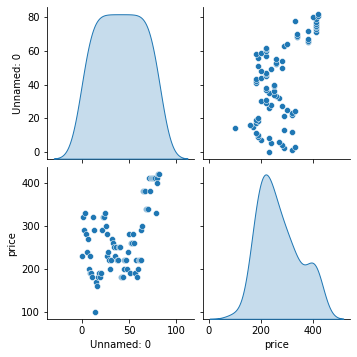

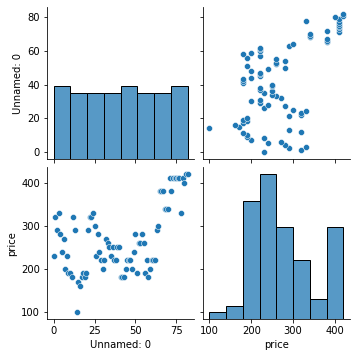

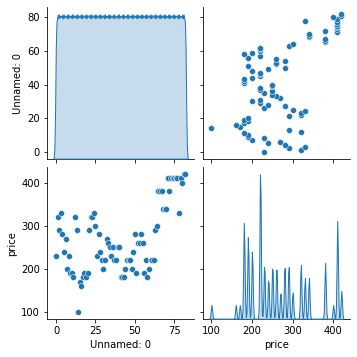

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/content/dish.csv')

sns.pairplot(df, diag_kind="kde")
sns.pairplot(df, diag_kind="hist")
sns.pairplot(df, diag_kind="kde", diag_kws=dict(shade=True, bw_adjust=.05, vertical=False) )
plt.show()

#Heatmap#

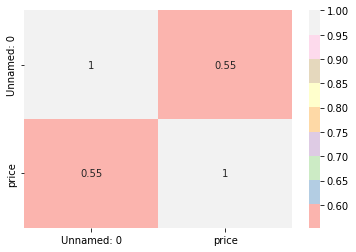

In [ ]:
sns.heatmap(df.corr(), annot = True, cmap = 'Pastel1')